In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
from operator import itemgetter

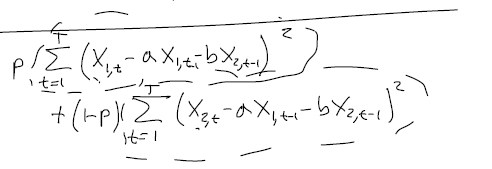

$$C = \frac{1}{T-1}\sum_{t = 2}^T \left(p \left(X_t - (aX_{t - 1} - b Y_{t-1})\right)^2 + (1 - p)\left(Y_t - (aX_{t-1} + bY_{t-1})\right)^2\right)$$

## Generate a Doubly Stochastic Matrix

In [2]:
def generate_data_nD(length, n, A):
    
    # Initialize series
    series = np.array(np.zeros((length, n)))
    
    # Precalculate inverse
    inv_P = np.linalg.inv(P)
    
    # Generate series
    for t in range(1, length):
        # Generate VAR model
        series[t] = np.matmul(inv_P, np.matmul(A, np.matmul(P, series[t - 1])) + np.random.multivariate_normal(np.zeros(n), np.identity(n)))
    
    return series

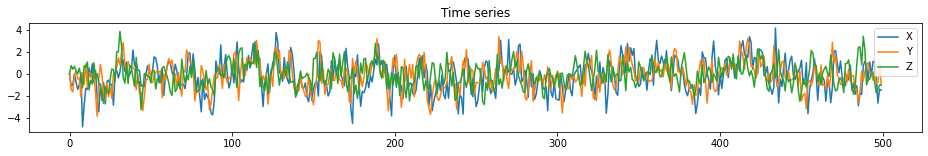

Actual A:
 [[0.4359949  0.         0.        ]
 [0.43532239 0.4203678  0.        ]
 [0.20464863 0.61927097 0.29965467]]

Actual P:
 [[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [20]:
np.random.seed(seed = 2)

length, n = 500, 3

# A matrix, lower triangular
A = np.tril(np.random.rand(n, n))
# A = np.array([[0.0, 0.0, 0.0], [0.8, 0.0, 0.0], [0.8, 0.8, 0.0]])

# Permutation
P = np.array([[0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0]])

# Generate nD data
series = generate_data_nD(length, n, A)

# Plot
plt.figure(figsize=(16,2))
plt.title("Time series")
plots = plt.plot(series)
plt.legend(plots, ["X", "Y", "Z"], loc=1)
plt.show()

print("Actual A:\n", A)

print("\nActual P:\n", P)

In [34]:
# three dimensional constraints
a = np.identity(10)[:4,]                                      # 0 <= p <= 1 for all p
a1 = np.append(np.array([1.0, 1.0, 0.0, 0.0]), np.zeros(6))   # 0 <= sum(row(1)) <= 1
a2 = np.append(np.array([0.0, 0.0, 1.0, 1.0]), np.zeros(6))   # 0 <= sum(row(2)) <= 1
a3 = np.append(np.array([1.0, 0.0, 1.0, 0.0]), np.zeros(6))   # 0 <= sum(col(1)) <= 1
a4 = np.append(np.array([0.0, 1.0, 0.0, 1.0]), np.zeros(6))   # 0 <= sum(col(2)) <= 1
a5 = np.append(np.array([1.0, 1.0, 1.0, 1.0]), np.zeros(6))   # 0 <= sum(col(3)) <= 1

outcome = []

# set constraints
V = np.vstack((a, a1, a2, a3, a4, a5))
L = [0, 0, 0, 0, 0, 0, 0, 0, 1]
U = [1, 1, 1, 1, 1, 1, 1, 1, 2]

np.random.seed(seed = 1)

for _ in range(5):
    # minimize, starting from a random entry
    results = optimize.minimize(C_n_v4_2, np.random.rand(10), constraints = optimize.LinearConstraint(V, L, U)).x

    # get results
    P_DS_out = p_list_to_p_matrix(results[:4])
    P_perm_out = closest_perm_1(np.round(p_list_to_p_matrix(results[:4]), 2))
    
    A_out = np.array([[results[4], 0, 0], [results[5], results[6], 0], [results[7], results[8], results[9]]])
    
    print(np.round(P_DS_out, 2))
    print("B:\n", np.round(np.matmul(np.linalg.inv(P_DS_out), np.matmul(A_out, P_DS_out)), 3))
    print("B*:\n", np.matmul(np.linalg.inv(P), np.matmul(A, P)))
    
    outcome.append([P_perm_out, np.linalg.norm(P_DS_out - P_perm_out, ord='fro')])
    print(C_n_v4_2(results))
    
    # print(P_perm_out)
    # print(round(np.linalg.norm(P_DS_out - P_perm_out, ord='fro'), 3))

outcome = sorted(outcome, key=itemgetter(1))

for elem in outcome:
    print("P:", elem[0])
    print("Cost:\n", elem[1])

[[ 0.12  0.38  0.5 ]
 [ 0.13  0.37  0.5 ]
 [ 0.75  0.25 -0.  ]]
B:
 [[0.241 0.653 0.123]
 [0.085 0.409 0.345]
 [0.031 0.    0.327]]
B*:
 [[0.29965467 0.61927097 0.20464863]
 [0.         0.4203678  0.43532239]
 [0.         0.         0.4359949 ]]
3.284015050982455
[[0.02 0.17 0.82]
 [0.04 0.77 0.18]
 [0.94 0.06 0.  ]]
B:
 [[ 0.235  0.646  0.136]
 [ 0.015  0.404  0.413]
 [ 0.002 -0.     0.383]]
B*:
 [[0.29965467 0.61927097 0.20464863]
 [0.         0.4203678  0.43532239]
 [0.         0.         0.4359949 ]]
3.263061594689659
[[0.01 0.14 0.85]
 [0.09 0.76 0.15]
 [0.9  0.1  0.  ]]
B:
 [[ 0.236  0.643  0.132]
 [ 0.024  0.37   0.372]
 [-0.     0.011  0.431]]
B*:
 [[0.29965467 0.61927097 0.20464863]
 [0.         0.4203678  0.43532239]
 [0.         0.         0.4359949 ]]
3.2724126700033396
[[0.02 0.2  0.78]
 [0.02 0.76 0.22]
 [0.96 0.04 0.  ]]
B:
 [[0.234 0.647 0.136]
 [0.014 0.41  0.414]
 [0.004 0.    0.38 ]]
B*:
 [[0.29965467 0.61927097 0.20464863]
 [0.         0.4203678  0.43532239]
 [0.   

In [9]:
def p_list_to_p_matrix(ps):
    P_matrix = np.zeros((n, n))
    P_matrix[:n-1,:n-1] = ps.reshape((n - 1, n - 1))
    P_matrix[:n-1, n - 1] = 1 - P_matrix[:n-1,:].sum(axis = 1)
    P_matrix[n - 1, :] = 1 - P_matrix.sum(axis = 0)
    return P_matrix

ps = np.array([0.2, 0.5, 0.1, 0.2])
print(p_list_to_p_matrix(ps))

[[0.2 0.5 0.3]
 [0.1 0.2 0.7]
 [0.7 0.3 0. ]]


In [33]:
def C_n_v4_2(variables):
    p11, p12, p21, p22 = variables[:4]
    P = np.array([[p11, p12, 1- p11 - p12], [p21, p22, 1- p21 - p22], [1 - p11 - p21, 1 - p12 - p22, 1 - (1 - p11 - p21) - (1 - p12 - p22)]])

    a11, a21, a22, a31, a32, a33 = variables[4:]
    A = np.array([[a11, 0.0, 0.0], [a21, a22, 0.0], [a31, a32, a33]])
    cost = 0

    P_inv = np.linalg.inv(P) # P.transpose() / np.linalg.det(P)
    B = np.matmul(P_inv, np.matmul(A, P))
    
    for t in range(1, length):
        val = series[t]
        est = np.matmul(B, series[t - 1])
        cost += np.linalg.norm(val - est, ord = 2) ** 2

    return cost / (length - 1) # + 0.1 * np.sum(np.abs(B)) # regularization

In [6]:
def C_n_v4(variables):
    p11, p12, p21, p22 = variables[:4]
    P = np.array([[p11, p12, 1- p11 - p12], [p21, p22, 1- p21 - p22], [1 - p11 - p21, 1 - p12 - p22, 1 - (1 - p11 - p21) - (1 - p12 - p22)]])

    a11, a21, a22, a31, a32, a33 = variables[4:]
    A = np.array([[a11, 0.0, 0.0], [a21, a22, 0.0], [a31, a32, a33]])
    cost = 0

    P_trans = P.transpose()
    for t in range(1, length):
        val = series[t]
        est = np.matmul(P_trans, np.matmul(A, np.matmul(P, series[t - 1])))
        cost += np.linalg.norm(val - est) ** 2

    return cost / (length - 1) # + np.abs(A)

In [16]:
def C_n_v3(variables):
    P = np.array([[variables[0], 1 - variables[0]], [1 - variables[0], variables[0]]])
    A = np.array([[variables[1], 0.0], [variables[2], variables[3]]])
    cost = 0

    for t in range(1, length):
        val = series[t]
        est = np.matmul(P.transpose(), np.matmul(A, np.matmul(P, series[t - 1])))
        cost += np.linalg.norm(val - est) ** 2

    print(cost / (length - 1))
    return cost / (length - 1) # + np.abs(A)

def C_n(variables):
    P = np.array([[variables[0], 1 - variables[0]], [1 - variables[0], variables[0]]])
    A = variables[1:]
    A = A.reshape((n, n))
    cost = 0

    for t in range(1, length):
        val = np.matmul(P, series[t])
        est = np.matmul(A, np.matmul(P, series[t - 1]))
        cost += np.linalg.norm(val - est) ** 2

    return cost / (length - 1)

def C_n2(variables):
    p = variables[0]
    a, b = variables[1], variables[2]
    
    cost = 0
    
    for t in range(1, length):
        val1 = series[t][0]
        est1 = a * series[t - 1][0] + b * series[t - 1][1]
        
        cost += p * (val1 - est1) ** 2
        
        val2 = series[t][1]
        est2 = a * series[t - 1][0] + b * series[t - 1][1]
        
        cost += (1 - p) * (val2 - est2) ** 2
    
    return cost / (length - 1)

# p_list = []
# for i in range(101):
#     p = i / 100
#     P[0][0] = p
#     p_list.append(C_n2([P, A]))
# plt.plot(p_list)
# P[0][0] = 0.5

# a_list = []
# for i in range(101):
#     a = i / 100
#     A[1][0] = a
#     a_list.append(C_n2([P, A]))
# A[1][0] = 0.5
# plt.plot(a_list)
# b_list = []
# for i in range(101):
#     b = i / 100
#     A[1][1] = b
#     b_list.append(C_n2([P, A]))
# A[1][1] = 0.5
# plt.plot(b_list)

# A[1][0] = 0.38
# A[1][1] = 0.55

In [83]:
results = np.ones((20, 20, 20))
for i in range(30):
    p = i / 30
    for j in range(20):
        a = j / 20
        for k in range(20):
            b = k / 20
            
            P[0][0] = p
            A[1][0] = a
            A[1][1] = b
            
            results[i][j][k] = C_n2([P, A])
print(np.argmin(results), np.min(results))

6 0.9737682184809954


## Find "Closest" permutation matrix
Using the Hungarian Algorithm, we can find the "closest" permutation matrix $P_{perm}$ to $P_{DS}$.

In [7]:
from scipy import optimize

def closest_perm_1(P_DS):
    # convert to get the maximum linear assignment problem
    P_MOD = np.ones((n, n)) * np.max(P_DS) - P_DS
    row_ind, col_ind = optimize.linear_sum_assignment(P_MOD)

    # Create Permutation matrix to return
    P_perm = np.zeros((n, n))

    for row, col in zip(row_ind, col_ind):
        P_perm[row][col] = 1 
    
    return P_perm

P_DS = gen_P(n)
print(P_DS)
print(closest_perm_1(P_DS), end = "\n\n")
print(closest_perm_2(P_DS), end = "\n\n")
print(closest_perm_3(P_DS), end = "\n\n")
print(closest_perm_4(P_DS), end = "\n\n")

NameError: name 'gen_P' is not defined

In [13]:
def closest_perm_2(P_DS):
    P_2 = P_DS.copy()
    # for each row
    for _ in range(n):
        # Normalize each row by dividing by its smallest non-zero entry
        for j in range(n):
            P_2[:, j] /= np.min(P_2[:, j][np.nonzero(P_2[:, j])])

        # get largest entry in P
        i, j = np.unravel_index(np.argmax(P_2, axis=None), P_2.shape)

        # set all other values in that row and column to zero
        for i1 in range(n):
            P_2[i][i1] = 0
            P_2[i1][j] = 0

        # set the largest entry in P to 1
        P_2[i][j] = 1

    return P_2

In [14]:
def closest_perm_3(P_DS):
    P_2 = P_DS.copy()
    # for each row
    for _ in range(n):
        # Normalize each row by dividing by its smallest non-zero entry
        for i in range(n):
            P_2[i] /= np.min(P_2[i][np.nonzero(P_2[i])])


        # get largest entry in P
        i, j = np.unravel_index(np.argmax(P_2, axis=None), P_2.shape)

        # set all other values in that row and column to zero
        for i1 in range(n):
            P_2[i][i1] = 0
            P_2[i1][j] = 0

        # set the largest entry in P to 1
        P_2[i][j] = 1

    return P_2

In [15]:
def closest_perm_4(P_DS):
    P_2 = P_DS.copy() * -1
    # for each row
    for _ in range(n):
        # get largest entry in P
        i, j = np.unravel_index(np.argmin(P_2, axis=None), P_2.shape)
    
        # set all other values in that row and column to zero
        for i1 in range(n):
            P_2[i][i1] = 0
            P_2[i1][j] = 0
        
        # set the largest entry in P to 1
        P_2[i][j] = 1

    return P_2